### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [77]:
data = pd.read_csv('data/coupons.csv')

In [78]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [79]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [80]:
#From the looks of it, the Coffee House, Carry Away, RestaurantLessThan20, and Restaurant20-50 are mostly complete but have some null values.
#The car column is likely useless given how few non-null entries there are, and should probably be dropped.
data2=data.drop('car', axis=1)
data2[data2.isnull().any(axis=1)]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,1
12410,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,0,1,1
12411,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,0
12412,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,1,0,1,0


In [81]:
#Looking at the rows with missing entries after we remove the 'car' column shows that there are 605 rows with at least one missing entry


3. Decide what to do about your missing data -- drop, replace, other...

In [82]:
#We clearly need to drop the 'car' column
#as for the remaining null entries, it's a bit harder to say what we should do. 
#the columns with missing data all relate to the self reported frequency that the person visits a given establishment
#The method that would probably preserve the most data would be to remove only the rows where the coupon matches the null column
#however, it would be much easier to just drop any row with missing data, as we will only be losing 605/12684 rows (about 4.7% of our data)
data3=data2.dropna().reset_index(drop=True)
data3.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
6,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
7,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
8,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
9,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1


4. What proportion of the total observations chose to accept the coupon?



In [83]:
data3['Y'].value_counts(normalize=True)

Y
1    0.569335
0    0.430665
Name: proportion, dtype: float64

In [84]:
#It looks like 56.9% of people accepted the coupon

5. Use a bar plot to visualize the `coupon` column.

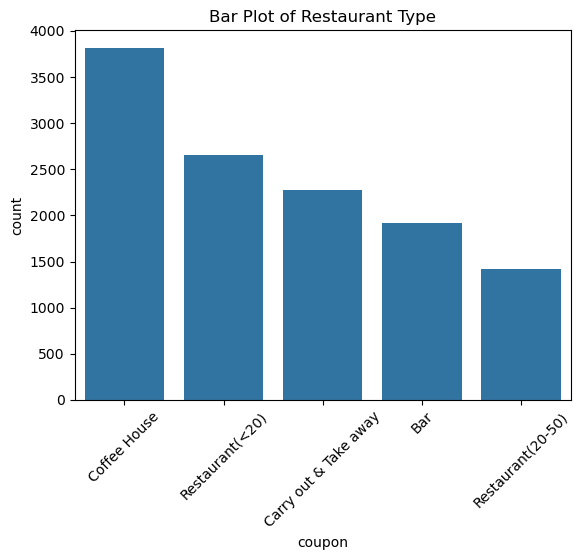

In [85]:
datacouponcount=data3['coupon'].value_counts().reset_index()
datacouponcount.columns = ['coupon','count']
sns.barplot(datacouponcount, x='coupon', y='count')
plt.xticks(rotation=45)
plt.title("Bar Plot of Restaurant Type")
plt.savefig('images/coupon_bar.png')

6. Use a histogram to visualize the temperature column.

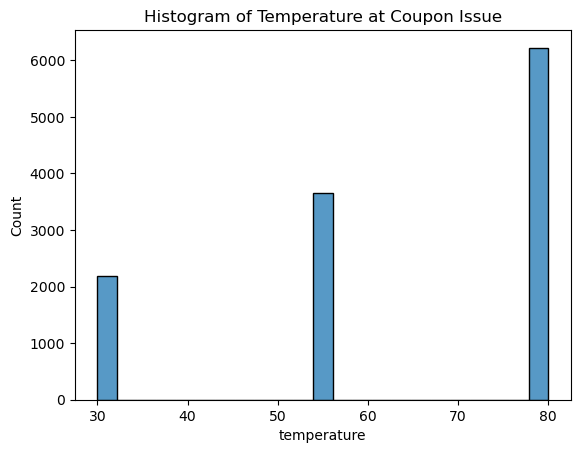

In [86]:
sns.histplot(data3['temperature'])
plt.title("Histogram of Temperature at Coupon Issue")
plt.savefig('images/temperature_hist.png')

In [87]:
#it looks like there's a skew towards low cost restaurants and coffee shops, and that the temperature at which coupons 
#are given skews towards higher values.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [88]:
databar=data3[data3['coupon']=='Bar']
databar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 2 to 12077
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obje

2. What proportion of bar coupons were accepted?


In [89]:
databar['Y'].value_counts(normalize=True)

Y
0    0.588082
1    0.411918
Name: proportion, dtype: float64

In [90]:
#It looks like 58.8% of bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [91]:
bargroups = { 'never' : '3orless', 'less1' : '3orless', '1~3' : '3orless', '4~8' : 'morethan3', 'gt8' : 'morethan3'}
databar2= databar.copy()
databar2['groups']=databar2['Bar'].map(bargroups)
databar2.groupby('groups')[['Y']].value_counts(normalize=True)


groups     Y
3orless    0    0.627326
           1    0.372674
morethan3  1    0.761658
           0    0.238342
Name: proportion, dtype: float64

In [92]:
# it looks like people who went to a bar 3 or fewer times per month accepted the bar coupon only 37.2% of the time
# while those that went to the bar more than 3 times a week accepted 76.2% of the time

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [93]:

databar3=databar.copy()
databar3['age']=pd.to_numeric(databar3['age'], errors='coerce').astype('Int64').fillna(50)
barfreqgroups = { 'never' : '1orless', 'less1' : '1orless', '1~3' : 'morethan1', '4~8' : 'morethan1', 'gt8' : 'morethan1'}
def baragegroups(age):
    if age < 25 :
        return 'lessthan25'
    elif age >=25 :
        return '25orolder'
databar3['freqgroup']=databar3['Bar'].map(barfreqgroups)
databar3['agegroup']=databar3['age'].apply(baragegroups)
databar3[(databar3['freqgroup']=='morethan1') & (databar3['agegroup']=='25orolder')]['Y'].value_counts(normalize=True)


Y
1    0.682809
0    0.317191
Name: proportion, dtype: float64

In [94]:
databar3[(databar3['freqgroup']!='morethan1') & (databar3['agegroup']!='25orolder')]['Y'].value_counts(normalize=True)

Y
0    0.621849
1    0.378151
Name: proportion, dtype: float64

In [95]:
#It looks like 68.3% of drivers older than 25 who visited a bar more than once a month accepted the coupon, while only
#37.8% of all other drivers accepted the coupon to the bar

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [96]:
databar3['passanger'].value_counts()

passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

In [97]:
databar3['occupation'].value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

In [98]:
databar3[(databar3['freqgroup']=='morethan1') & (databar3['passanger'].isin(['Kid(s)','Alone'])) & (databar3['occupation']!='Farming Fishing & Forestry')]['Y'].value_counts(normalize=True)

Y
1    0.671018
0    0.328982
Name: proportion, dtype: float64

In [99]:
databar3[(databar3['freqgroup']!='morethan1') | (databar3['passanger'].isin(['Friend(s)','Partner'])) | (databar3['occupation']=='Farming Fishing & Forestry')]['Y'].value_counts(normalize=True)

Y
0    0.652941
1    0.347059
Name: proportion, dtype: float64

In [100]:
#It looks like, among those who visit bars more than once a month with non child passengers who were not in FF&F, the acceptance rate
#of bar coupons was 67.1%, while for all others it was 34.7%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [101]:
databar3[(databar3['freqgroup']=='morethan1') & (databar3['passanger'].isin(['Kid(s)','Alone'])) & (databar3['maritalStatus']!='Widowed')]['Y'].value_counts(normalize=True)

Y
1    0.671018
0    0.328982
Name: proportion, dtype: float64

In [102]:
databar3[(databar3['freqgroup']=='morethan1') & (databar3['age']<30) ]['Y'].value_counts(normalize=True)

Y
1    0.72956
0    0.27044
Name: proportion, dtype: float64

In [103]:
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [104]:
cheapfreqgroup = { 'never' : 'lessthan4', 'less1' : 'lessthan4', '1~3' : 'lessthan4', '4~8' : '4ormore', 'gt8' : '4ormore'}
incomegroup = {'Less than $12500' : 'under50', '$12500 - $24999' : 'under50', '$25000 - $37499' : 'under50', '$37500 - $49999' : 'under50', '$50000 - $62499' : 'over50', '$62500 - $74999' : 'over50', '$75000 - $87499' : 'over50', '$87500 - $99999' : 'over50', '$100000 or More' : 'over50'} 
databar4 = databar3.copy()
databar4['incomegroup']=databar4['income'].map(incomegroup)
databar4['cheapfreqgroup']=databar4['RestaurantLessThan20'].map(cheapfreqgroup)
databar4['Y'].value_counts()
databar4[(databar4['cheapfreqgroup']=='4ormore') & (databar4['incomegroup']=='under50')]['Y'].value_counts(normalize=True)

Y
0    0.543544
1    0.456456
Name: proportion, dtype: float64

In [105]:
# 67.1% of those who go to bars more than once a month, had passengers that weren't a kid, and were not widowed accepted the coupon

In [106]:
# 73.0% of those who go to bars once a month and are under the age of 30 accepted the coupon

In [107]:
#45.6% of those who go to cheap restaurants more than 4 times a month with an income less than 50k accepted the coupon.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [108]:
# There's evidence here that there's a strong correlation between the frequency with which the driver visits a bar and their likelihood to use a bar coupon.
# I might also hypothesize that those who accept bar coupons are more likely to be young, without kids, and with higher income.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [109]:
#let's examine the set of drivers that were offered coupons to a Coffee House

In [110]:
datacof = data3[data3['coupon']=='Coffee House']
datacof.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
6,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
8,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
10,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
12,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,0
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0


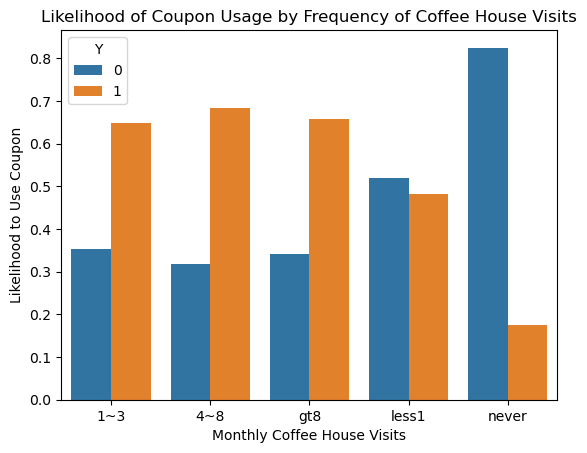

In [111]:
#similar to how we examined the bar coupon data, let's examine the relationship between frequency of coffee house visits
# and likelihood to use the coupon
datacof1=datacof.groupby('CoffeeHouse')[['Y']].value_counts(normalize=True).reset_index(name='proportion')
sns.barplot(datacof1, x='CoffeeHouse', y='proportion', hue='Y')
plt.title("Likelihood of Coupon Usage by Frequency of Coffee House Visits")
plt.xlabel("Monthly Coffee House Visits")
plt.ylabel("Likelihood to Use Coupon")
plt.savefig('images/CoffeeFreq.jpg')

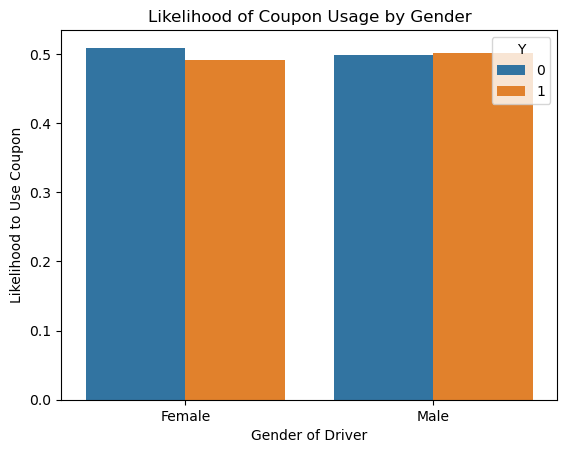

In [112]:
#It looks like there's a strong positive association between the frequency of coffee house visits and the likelihood to use a coupon
#However, the strength of this relationship dies off for those that report visiting a coffee house more than once a month.
#Let's examine whether or not gender plays a role in the likelihood to use a coupon
datacof2=datacof.groupby('gender')[['Y']].value_counts(normalize=True).reset_index(name='proportion')
sns.barplot(datacof2, x='gender', y='proportion', hue='Y')
plt.title("Likelihood of Coupon Usage by Gender")
plt.xlabel("Gender of Driver")
plt.ylabel("Likelihood to Use Coupon")
plt.savefig('images/CoffeeGender.jpg')

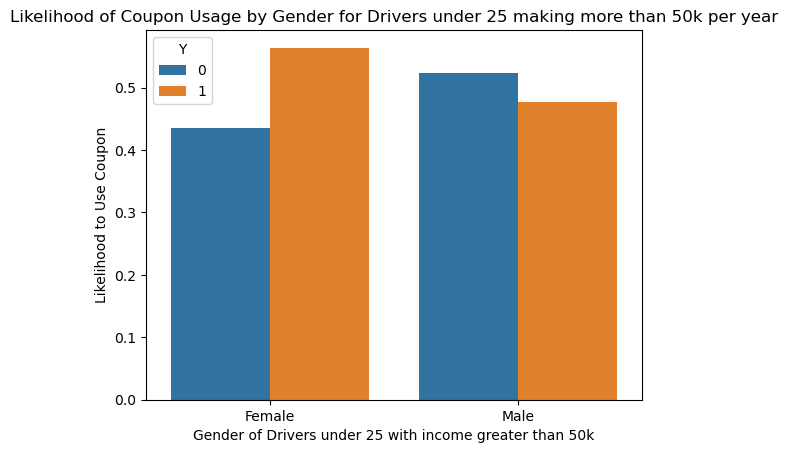

In [113]:
# On the whole, gender does not appear to influence the likelihood of coupon use, but it's possible that if we refine our search there may still be
#a correlation. Let's examine whether there is any change to this pattern when we look at people under 30 with incomes greater than $50,000.
incomegroup = {'Less than $12500' : 'under50', '$12500 - $24999' : 'under50', '$25000 - $37499' : 'under50', '$37500 - $49999' : 'under50', '$50000 - $62499' : 'over50', '$62500 - $74999' : 'over50', '$75000 - $87499' : 'over50', '$87500 - $99999' : 'over50', '$100000 or More' : 'over50'} 
datacof3=datacof.copy()
def cofagegroups(age):
    if age < 25 :
        return 'lessthan25'
    elif age >=25 :
        return '25orolder'
datacof3['incomegroup']=datacof3['income'].map(incomegroup)
datacof3['age']=pd.to_numeric(datacof3['age'], errors='coerce').astype('Int64').fillna(50)
datacof3['agegroup']=datacof3['age'].apply(cofagegroups)
datacof3_1=datacof3[(datacof3['incomegroup']=='over50') & (datacof3['agegroup']=='lessthan25')].groupby('gender')[['Y']].value_counts(normalize=True).reset_index(name='proportion')
sns.barplot(datacof3_1, x='gender', y='proportion', hue = 'Y')
plt.title("Likelihood of Coupon Usage by Gender for Drivers under 25 making more than 50k per year")
plt.xlabel("Gender of Drivers under 25 with income greater than 50k")
plt.ylabel("Likelihood to Use Coupon")
plt.savefig('images/CoffeeGender2.jpg')

In [114]:
#interestingly, women under the age of 25 with a significant disposable income are more likely than their male counterparts
#to use the coffee coupons. Let's see if we can get more information about the link between gender and coffee shop usage. Do women and men
# prefer to go to coffee shops at different times of day?

datacof['time'].value_counts()

time
6PM     1043
7AM      875
10AM     857
2PM      759
10PM     282
Name: count, dtype: int64

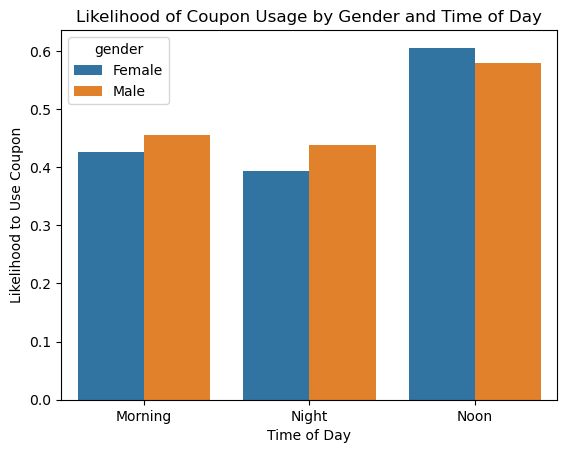

In [115]:
#let's group these by morning, noon, and night.
timegroup = {'7AM' : 'Morning', '10AM' : 'Noon', '2PM' : 'Noon', '6PM' : 'Night', '10PM' : 'Night'}
datacof4 =datacof.copy()
datacof4['timegroup']=datacof4['time'].map(timegroup)
datacof4 = datacof4.groupby(['timegroup', 'gender'])[['Y']].value_counts(normalize=True).reset_index(name='proportion')
sns.barplot(data=datacof4[datacof4['Y']==1], x='timegroup', y='proportion', hue='gender')
plt.title("Likelihood of Coupon Usage by Gender and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Likelihood to Use Coupon")
plt.savefig('images/CoffeeGender3.jpg')


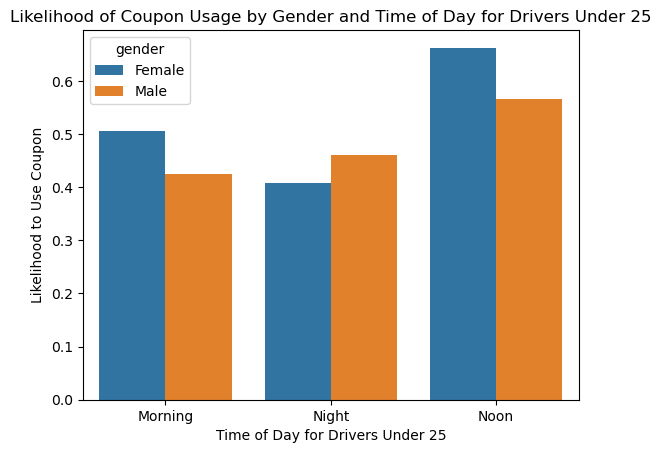

In [116]:
#here we can observe some slight difference in behavior between men and women. Men are more likely than women to use the coupon
#at the beginning or end of the day, while women are more likely than men to use the coupon during the noon time hours. 
#Let's see how this pattern extends to people under the age of 25 (excluding income this time)
timegroup = {'7AM' : 'Morning', '10AM' : 'Noon', '2PM' : 'Noon', '6PM' : 'Night', '10PM' : 'Night'}
def cofagegroups(age):
    if age < 25 :
        return 'lessthan25'
    elif age >=25 :
        return '25orolder'
datacof5 =datacof.copy()
datacof5['age']=pd.to_numeric(datacof5['age'], errors='coerce').astype('Int64').fillna(50)
datacof5['agegroup']=datacof5['age'].apply(cofagegroups)
datacof5['timegroup']=datacof5['time'].map(timegroup)
datacof5=datacof5[datacof5['agegroup']=='lessthan25']
datacof5 = datacof5.groupby(['timegroup', 'gender'])[['Y']].value_counts(normalize=True).reset_index(name='proportion')
sns.barplot(data=datacof5[datacof5['Y']==1], x='timegroup', y='proportion', hue='gender')
plt.title("Likelihood of Coupon Usage by Gender and Time of Day for Drivers Under 25")
plt.xlabel("Time of Day for Drivers Under 25")
plt.ylabel("Likelihood to Use Coupon")
plt.savefig('images/CoffeeGender4.jpg')

In [117]:
#Here we see that women under the age of 25 are more likely  to use coffee coupons in the morning and noon hours, but young
# men are actually more likely than women to use the coupons late at night.

In [118]:
#Taking all of this data into account, let's answer the question of how gender and age affect the likelihood of coupon usage.
#While not apparent at first glance, there is a difference in behavior between men and women in coffee shop coupon usage;
# When looking at those under 25 with higher incomes, women  accept the coffee shop coupons more frequently than men. In addition,
#There is a time dependent pattern of consumption that appears to be driven by this demographic: young women prefer morning and noon hours,
#while men in general are more likely to accept coffee coupons at night. This highlights a key demographic for coffee consumption that
#Amazon might look to target in its coupon strategy. 